<a href="https://colab.research.google.com/github/DionesGouvea/House-Price-Prediction-QuintoAndar/blob/main/Precifica%C3%A7%C3%A3o_de_im%C3%B3veis_Quinto_Andar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Contexto analítico**

A área de marketing do QuintoAndar quer montar uma calculadora de preço (como esta [aqui: https://mkt.quintoandar.com.br/quanto-cobrar-de-aluguel/), e nesse projeto, os analistas negociais e corretores querem, também, entender as principais variáveis e características chaves que influenciam no valor de venda do imóvel (Ex: quantificar o impacto do aumento da área do imóvel no preço, ou quantificar o impacto de ter piscina, ou não no preço)


**Objetivo 1**, interpretabilidade: construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

**Objetivo 2**, predição: construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como a calculadora de preço.

####**Base de dados**
O conjunto de dados descreve a venda de propriedades residenciais individuais de uma cidade americana, de 2006 a 2010.


**Esse desafio foi construído em parceria entre a Tera e o QuintoAndar, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.**


In [274]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importando os dados

In [275]:
df = pd.read_csv("/content/base.csv")
df.drop('Id', axis=1, inplace=True)
df['AreaConstruida'].max()

5642

In [276]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   Beco                  91 non-null     object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

In [277]:
#Pegando as variaveis numericas 
num_vars = df.select_dtypes(include =['int','float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove('PrecoVenda')
print(f'Variaveis numericas {num_vars}')
print(' ')

#pegando as variaveis categoricas
cat_vars = df.select_dtypes(include =['object']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'Variaveis categoricas {cat_vars}')

Variaveis numericas ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
 
Variaveis categoricas ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'Qualidade

#Analise exploratoria

### Analise Univariada 

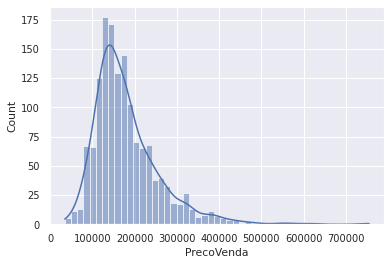

In [278]:
#visualizando a distribuição da nossa variavel target Preco de venda 
sns.histplot(df['PrecoVenda'],kde = True)

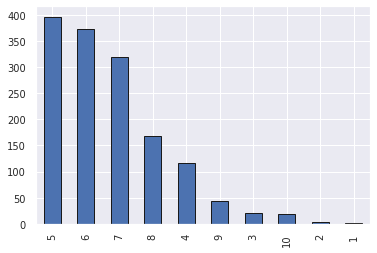

In [279]:
#visualizando a distribuição de qualidade de materiais usado na construção da casa. 
#sendo 1 muito ruim e 10 muito excelente.
df["Qualidade"].value_counts().plot(kind = 'bar',edgecolor = 'k')

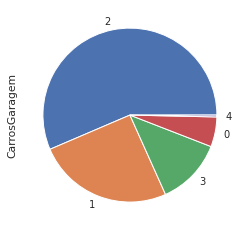

In [280]:
#Visualizando tamanho da garagem em capacidade de carros
df["CarrosGaragem"].value_counts().plot(kind = 'pie')

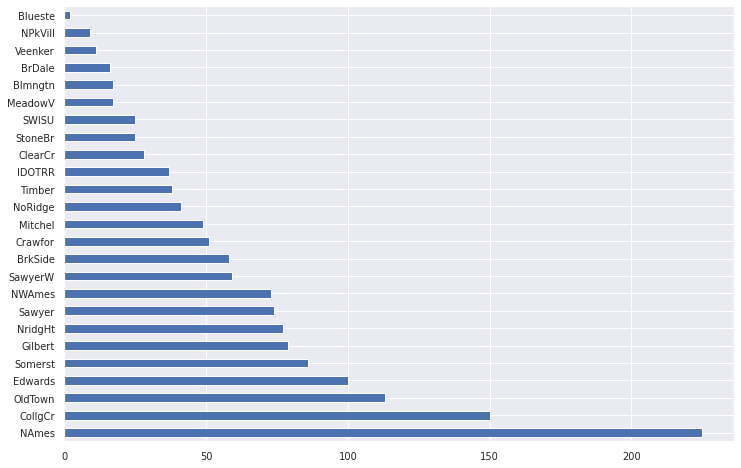

In [281]:
#visualizando a distribuição por bairros 
df["Bairro"].value_counts().plot(kind = 'barh',figsize = (12,8))

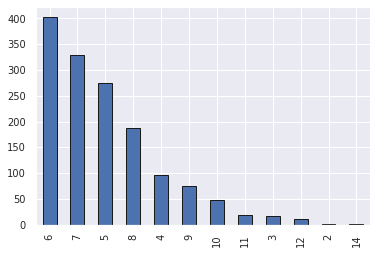

In [282]:
df["TotalQuartos"].value_counts().plot(kind = 'bar',edgecolor = 'k')

### Analise Bivariada 

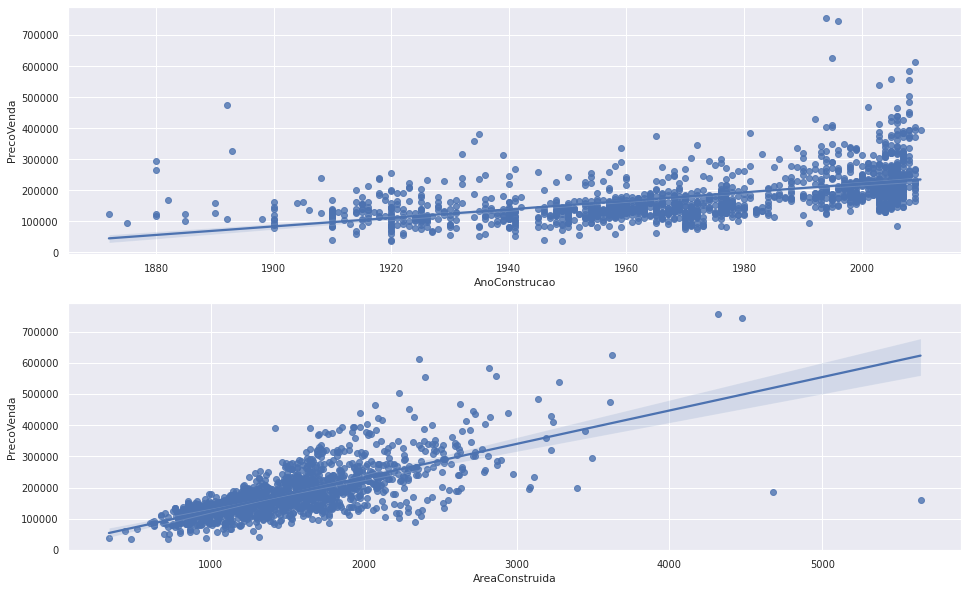

In [283]:
fig, axs = plt.subplots(figsize = (16,10),ncols = 1, nrows = 2)

#visualizando a relação de ano de construção com preço de venda 
sns.regplot(x='AnoConstrucao', y = 'PrecoVenda', data = df,ax=axs[0])
#visualizando a relação de area construida com preço de venda
sns.regplot(x='AreaConstruida', y = 'PrecoVenda', data = df,ax=axs[1])


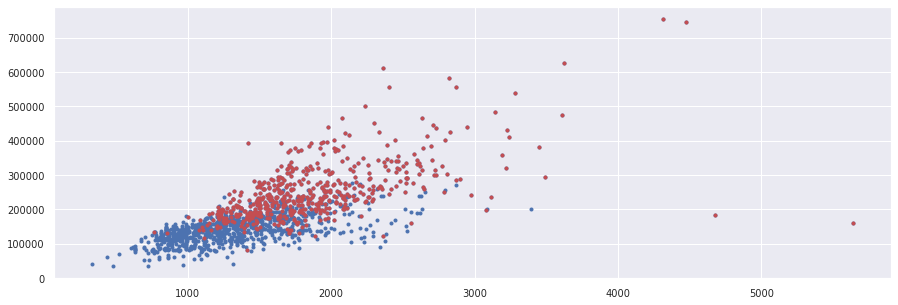

In [284]:
#visualizando se a qualidade dos materias serem 7 ou maior influencia no preço 
plt.figure(figsize= (15,5))
plt.plot(df.AreaConstruida,df.PrecoVenda,'.')
plt.plot(df.loc[df.Qualidade >= 7].AreaConstruida,df.loc[df.Qualidade >= 7].PrecoVenda,'r.')

Aparentemente existe uma relação entre a qualidade de materias da casa e o preço de venda 

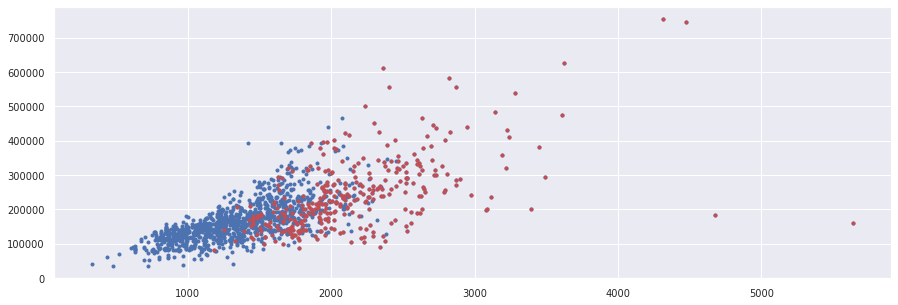

In [285]:
#verificando se existe relação entre o numero de quartos e o preço 
plt.figure(figsize= (15,5))
plt.plot(df.AreaConstruida,df.PrecoVenda,'.')
plt.plot(df.loc[df.TotalQuartos >= 8].AreaConstruida,df.loc[df.TotalQuartos >= 8].PrecoVenda,'r.')

o numero de quartos não parece ter muita influencia sobre o preço 

In [286]:
#criando uma matriz com os nomes das variaveis categoricas para visualizalas de uma unica vez 
cat_vars = [['ClasseZona','Rua'],
 ['Beco','FormaProp'],
 ['PlanoProp','Servicos'],
 ['ConfigLote','InclinacaoLote'],
 ['Bairro','Estrada1'],
 ['Estrada2','TipoHabitacao'],
 ['EstiloHabitacao','TipoTelhado'],
 ['MaterialTelhado','Exterior1'],
 ['Exterior2','TipoAlvenaria'],
 ['QualidadeCobertura','CondicaoExterna'],
 ['TipoFundacao','AlturaPorao'],
 ['CondicaoPorao','ParedePorao'],
 ['TipoAcabPorao1','TipoAcabPorao2'],
 ['Aquecimento','QualidadeAquecimento'],
 ['ArCentral','InstalacaoEletrica'],
 ['QualidadeCozinha','Funcionalidade'],
 ['QualdiadeLareira','LocalGaragem'],
 ['AcabamentoGaragem','QualidadeGaragem'],
 ['CondicaoGaragem','EntradaPavimentada'],
 ['QualidadePiscina','QualidadeCerca'],
 ['Outros','TipoVenda'],
 ['CondicaoVenda','ClasseImovel']]

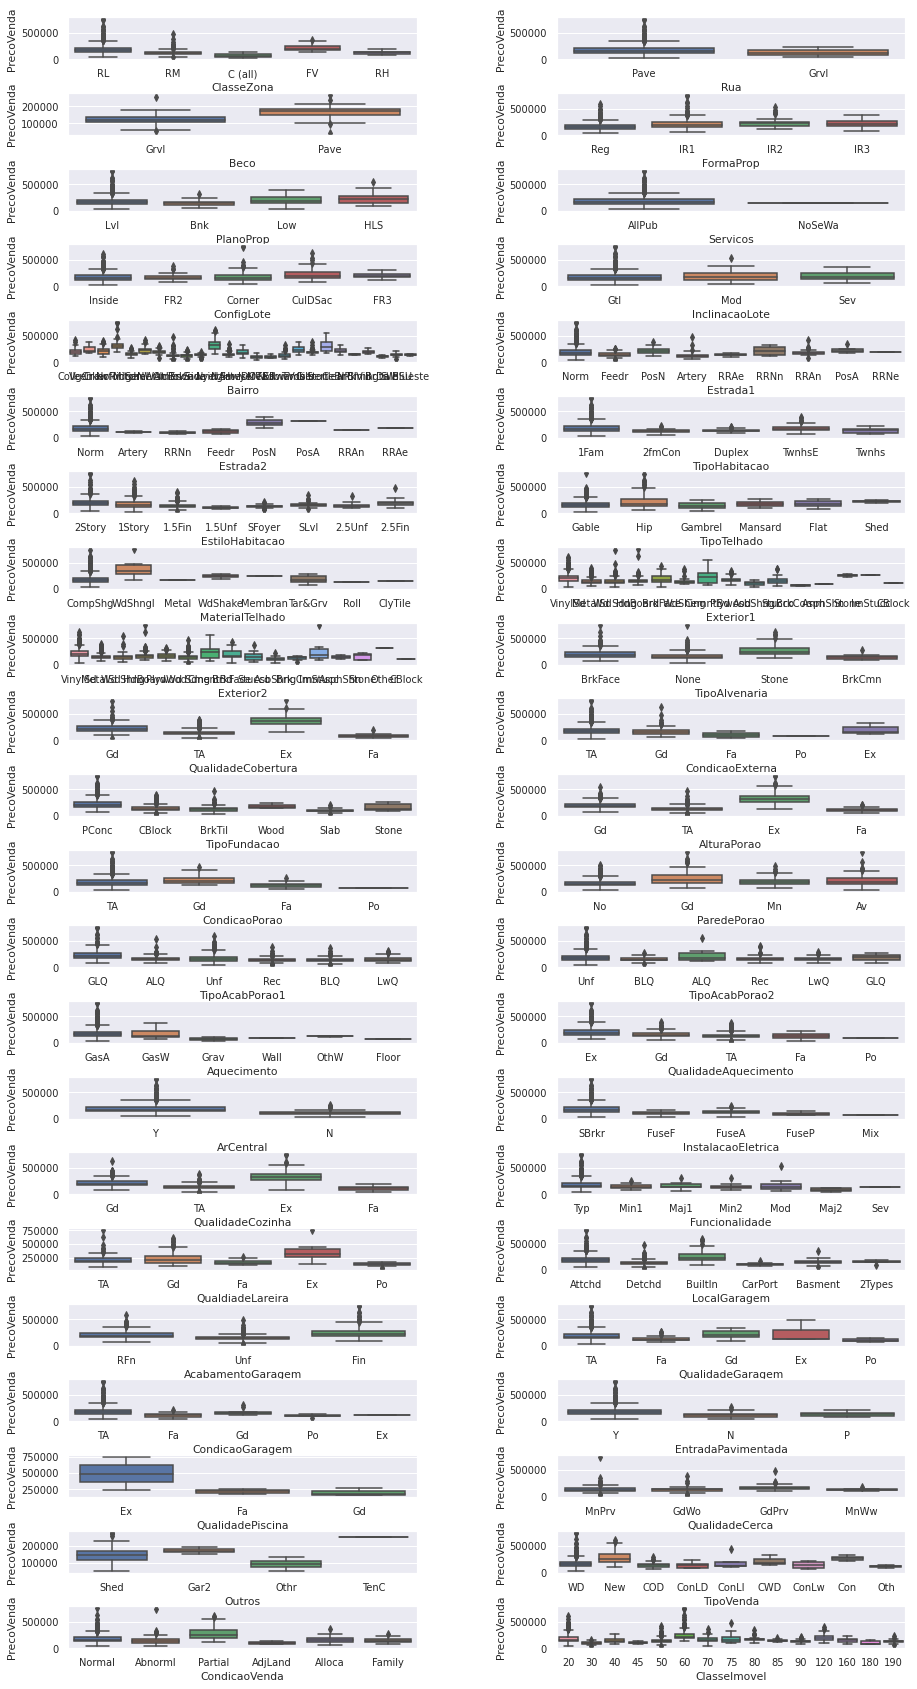

In [287]:
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(22,2,figsize=(15,30)) # Criando uma figura de 22 linhas x 2 colunas para nossa matriz
fig.subplots_adjust(hspace=0.8, wspace=0.4)
# Para cada linha 
for linha in range(22):
    # Para cada coluna   
    for coluna in range(2): 
      sns.boxplot(data=df,x=cat_vars[linha][coluna],y='PrecoVenda',ax=eixo[linha][coluna])

### visualizando as correlações com **heatmap** do seaborn

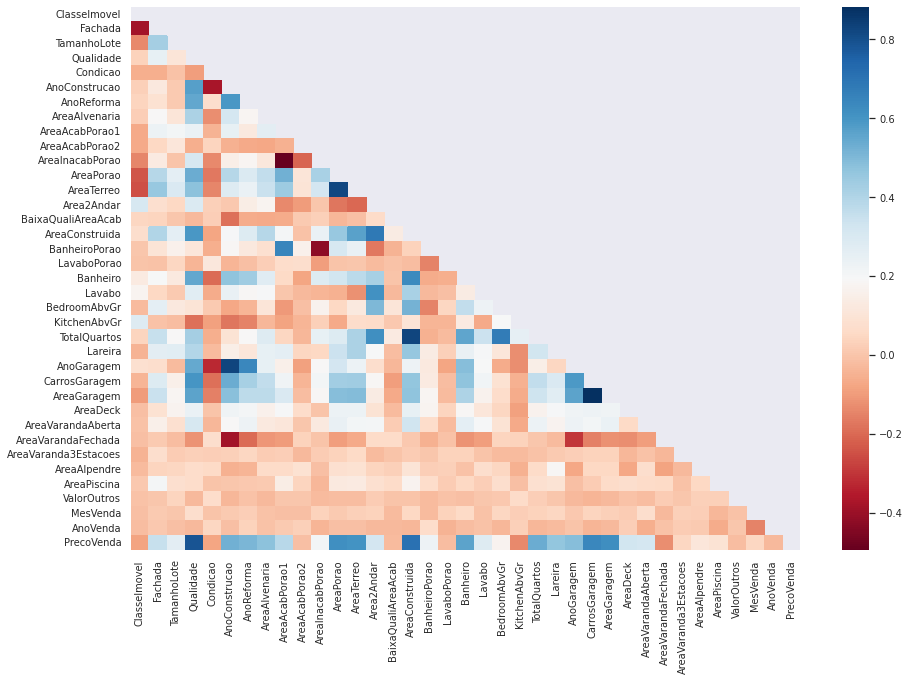

In [288]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

In [289]:
corr_matrix = df.corr()
corr_matrix['PrecoVenda'].sort_values(ascending = False)

PrecoVenda              1.000000
Qualidade               0.790982
AreaConstruida          0.708624
CarrosGaragem           0.640409
AreaGaragem             0.623431
AreaPorao               0.613581
AreaTerreo              0.605852
Banheiro                0.560664
TotalQuartos            0.533723
AnoConstrucao           0.522897
AnoReforma              0.507101
AnoGaragem              0.486362
AreaAlvenaria           0.477493
Lareira                 0.466929
AreaAcabPorao1          0.386420
Fachada                 0.351799
AreaDeck                0.324413
Area2Andar              0.319334
AreaVarandaAberta       0.315856
Lavabo                  0.284108
TamanhoLote             0.263843
BanheiroPorao           0.227122
AreaInacabPorao         0.214479
BedroomAbvGr            0.168213
AreaAlpendre            0.111447
AreaPiscina             0.092404
MesVenda                0.046432
AreaVaranda3Estacoes    0.044584
AreaAcabPorao2         -0.011378
LavaboPorao            -0.016844
ValorOutro

In [290]:
corr_matrix['AreaConstruida'].sort_values(ascending=False)

AreaConstruida          1.000000
TotalQuartos            0.825489
PrecoVenda              0.708624
Area2Andar              0.687501
Banheiro                0.630012
Qualidade               0.593007
AreaTerreo              0.566024
BedroomAbvGr            0.521270
AreaGaragem             0.468997
CarrosGaragem           0.467247
Lareira                 0.461679
AreaPorao               0.454868
Lavabo                  0.415772
Fachada                 0.402797
AreaAlvenaria           0.390857
AreaVarandaAberta       0.330224
AnoReforma              0.287389
TamanhoLote             0.263116
AreaDeck                0.247433
AreaInacabPorao         0.240257
AnoGaragem              0.231197
AreaAcabPorao1          0.208171
AnoConstrucao           0.199010
AreaPiscina             0.170205
BaixaQualiAreaAcab      0.134683
AreaAlpendre            0.101510
KitchenAbvGr            0.100063
ClasseImovel            0.074853
MesVenda                0.050240
BanheiroPorao           0.034836
AreaVarand

# Pré-Preprocessamento, limpeza dos dados, construção de features

### Tratando os dados nulos 

In [291]:
#pd.set_option('display.max_rows', 10)
df.isnull().mean().sort_values(ascending=False)

QualidadePiscina        0.995205
Outros                  0.963014
Beco                    0.937671
QualidadeCerca          0.807534
QualdiadeLareira        0.472603
                          ...   
Aquecimento             0.000000
QualidadeAquecimento    0.000000
ClasseZona              0.000000
AreaTerreo              0.000000
PrecoVenda              0.000000
Length: 80, dtype: float64

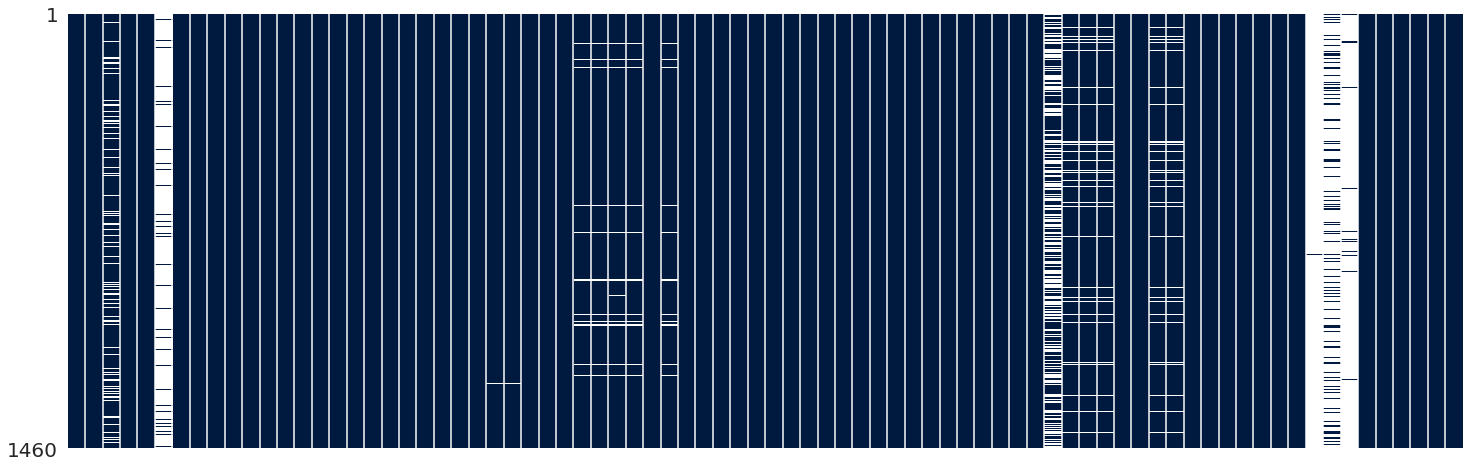

In [292]:
import missingno as msno
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

In [293]:
nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
nans[nans > 0.10]

Fachada             0.177397
Beco                0.937671
QualdiadeLareira    0.472603
QualidadePiscina    0.995205
QualidadeCerca      0.807534
Outros              0.963014
dtype: float64

In [294]:
remove = ['Fachada','Beco','QualdiadeLareira','QualidadePiscina','QualidadeCerca','Outros']
df.drop(remove,axis =1, inplace = True)

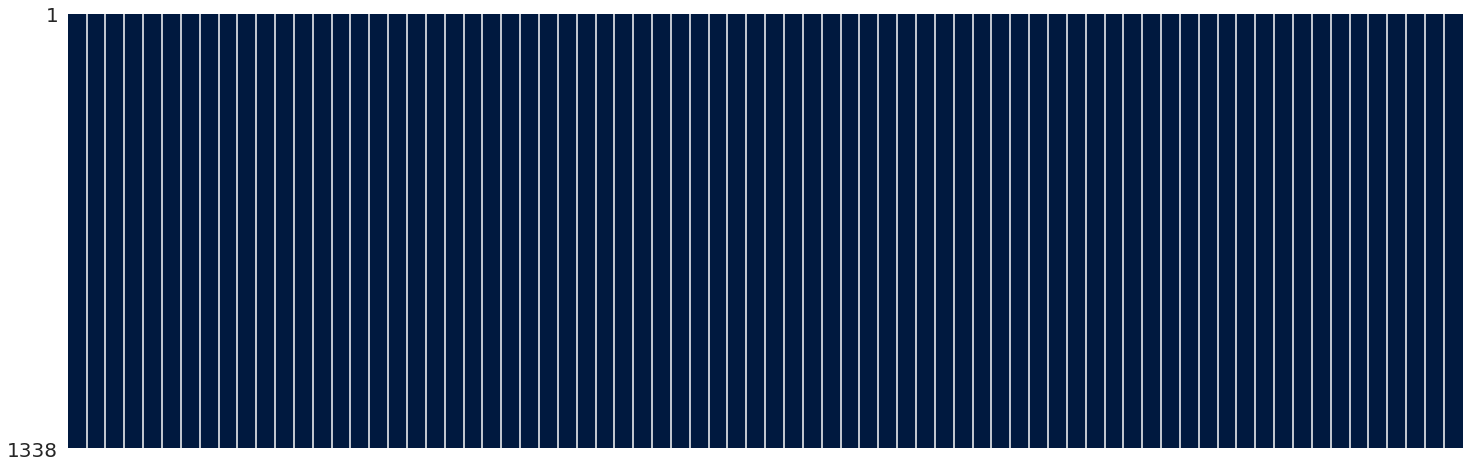

In [295]:
df = df.dropna()
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

### Feature engineering

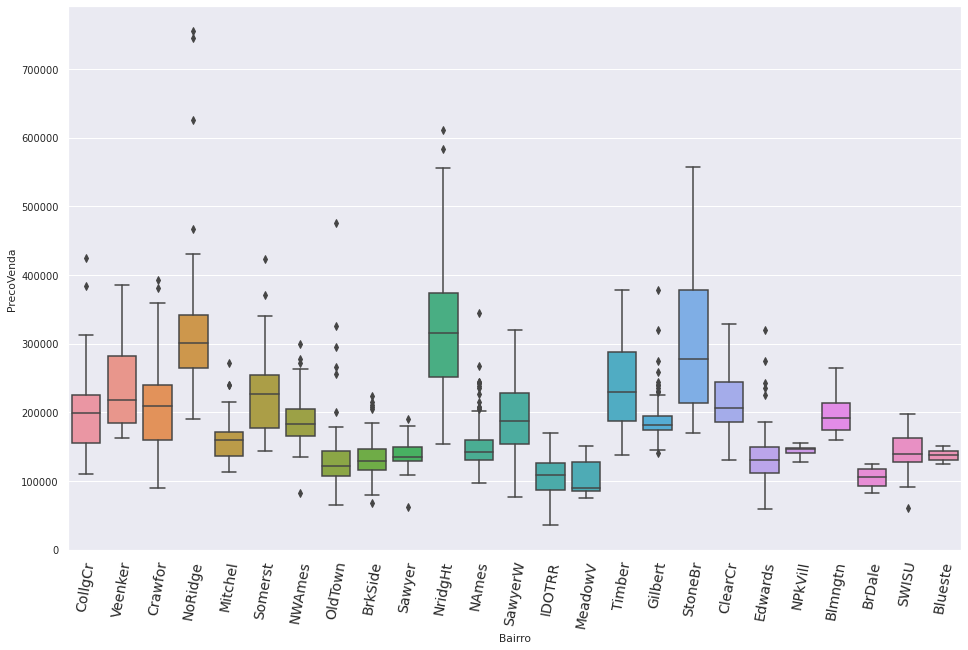

In [296]:
#analisando os preços dos imoveis por bairro
plt.figure(figsize = (16,10))
sns.boxplot(x='Bairro', y='PrecoVenda', data=df)
plt.xticks(fontsize = 14,rotation =80);

In [297]:
#criando um map onde os bairros mais pobres serão 0 e os bairros mais ricos serão 4
bairrosMap = {'MeadowV':0, 'BrDale':0, 'OldTown':0, 'Edwards':0,
              'BrkSide':1, 'Sawyer':1, 'Blueste':1,'SWISU':1, 'NAmes':1, 'NPkVill':1, 'Mitchel':1,
              'SawyerW':2, 'Gilbert':2,'NWAmes':2, 'Blmngtn':2,'CollgCr':2,
              'ClearCr':3,'Crawfor':3, 'Veenker':3, 'Somerst':3, 'Timber':3,'IDOTRR':3,
              'StoneBr':4, 'NoRidge':4, 'NridgHt':4}

#criando uma nova feature e passando o map 
df['bairros_cat'] = df['Bairro'].map(bairrosMap)

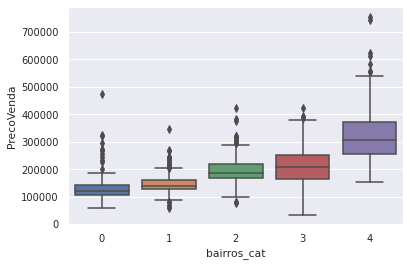

In [298]:
#visualizando a variação do preço por bairros com a nova feature. 
sns.boxplot(x='bairros_cat', y='PrecoVenda', data=df)

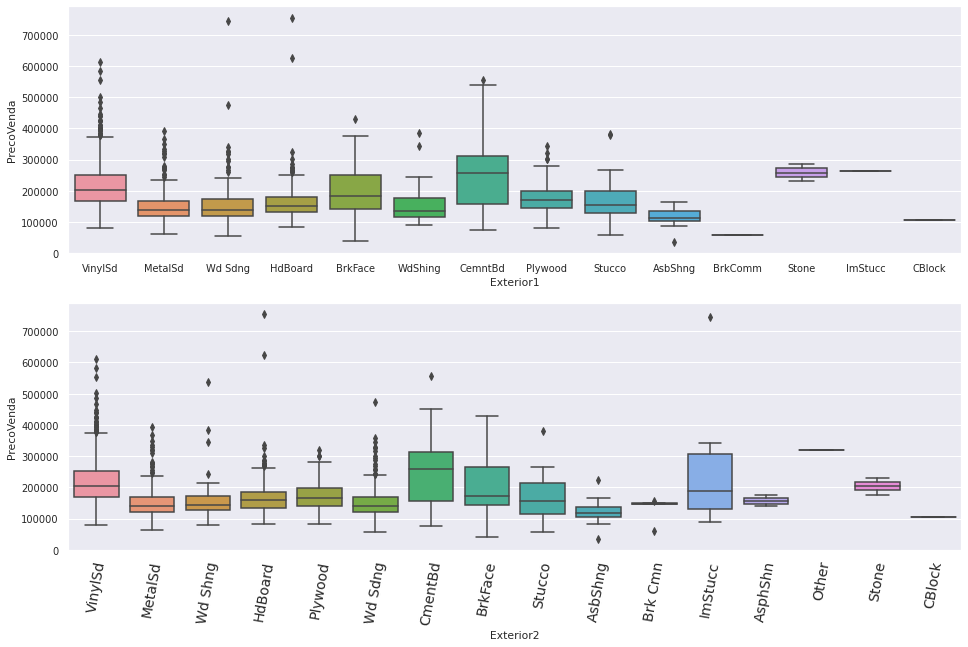

In [299]:
#analisando o relação de material utilizado na parte externa da casa com o preço 
fig, axs = plt.subplots(figsize = (16,10),ncols = 1, nrows = 2)
sns.boxplot(x='Exterior1', y='PrecoVenda', data=df,ax=axs[0])
sns.boxplot(x='Exterior2', y='PrecoVenda', data=df,ax=axs[1])
plt.xticks(fontsize = 14,rotation =80);

In [300]:
#criando um map para classificar os tipos de materiais em 3 categorias em uma nova feature
exterMap = {'MetalSd':0,'Wd Sdng':0,'HdBoard':0,'WdShing':0,'Plywood':0,'Stucco':0,'AsbShng':0,'BrkComm':0,'Brk Cmm':0,'AsphShn':0,'CBlock':0,
            'VinylSd':1,'BrkFace':1,'ImStucc':1,
            'Other':2,'CemntBd':2,'Stone':2}

#aplicando o map 
df['exterior_num'] = df['Exterior1'].map(exterMap)

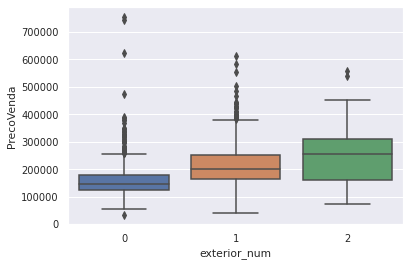

In [301]:
#visualizando a variação dos preços por tipo de material na nova feature 
sns.boxplot(x='exterior_num', y='PrecoVenda', data=df)

In [302]:
df['Altura_Porao_Num'] = df['AlturaPorao'].map({'Ex':9.0,'Gd':8.0,'TA':7.0,'Fa': 6.0, 'Po':5.0, 'NA':0})


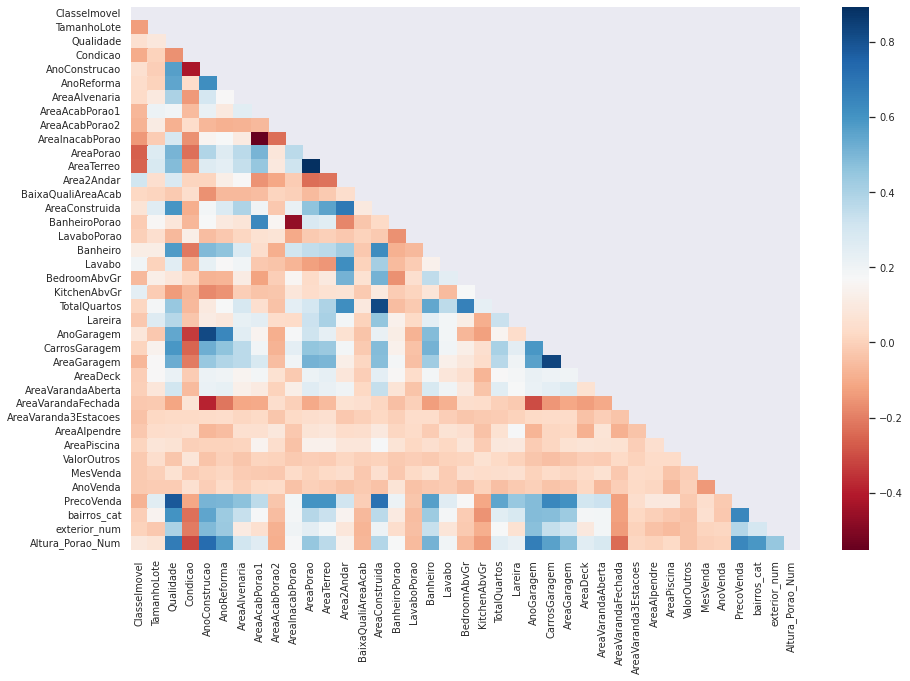

In [303]:
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()


#1. Objetivo I - Regressão Linear para interpretabilidade

In [304]:
#seleção das variaveis mais importantes para interpretações 
df_interp = df[['TamanhoLote','Qualidade','Condicao','AreaGaragem','AreaConstruida','AreaPorao','AreaTerreo',
 'Area2Andar','Altura_Porao_Num','bairros_cat','ArCentral','exterior_num','PrecoVenda','AnoConstrucao','Banheiro']]

#dando um pouco mais de complexidade para o modelo 
df_interp['AreaConstruida_x3'] = df_interp['AreaConstruida']**3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [305]:
df_onehot = pd.get_dummies(df_interp, drop_first= True)

In [306]:
X = df_onehot.drop('PrecoVenda',axis =1)
y = df_onehot.PrecoVenda

In [308]:
#dividindo entre teste e treino 
X_tr, X_ts,y_tr,y_ts =train_test_split(X,y ,test_size = 0.30, random_state= 666)
X_tr.shape, X_ts.shape

((936, 15), (402, 15))

In [309]:
#normalizando as variaveis para uma distribuição normal
from sklearn.preprocessing import StandardScaler

cols_scale = ['TamanhoLote',
 'AreaPorao',
 'AreaTerreo',
 'Area2Andar',
 'AreaConstruida',
 'AreaGaragem',
 'AreaConstruida_x3',
 'Qualidade',
 'Condicao',
 'Altura_Porao_Num',
 'bairros_cat',
 'AnoConstrucao'
 ]


scaler = {} #vamos usar para obter a media real sem scala 
for col in cols_scale:
  scaler[col] = StandardScaler()


  scaler[col].fit(X_tr[[col]]) #.fit fazendo o treino da variavel X_tr onde ele aprende qual a minha media e desvio padrão 

  #[:,col] todas as linhas da coluna 
  X_tr.loc[:,col] = scaler[col].transform(X_tr[[col]]) #.transform pegando o preço do carro e subtraindo da minha media e dividindo pelo desvio padrão 
  X_ts.loc[:,col] = scaler[col].transform(X_ts[[col]])

In [310]:
from sklearn.linear_model import LinearRegression
#fit_intercept = True para calcular o preço Padrão
lr = LinearRegression(fit_intercept=True, normalize =False, n_jobs = -1)
lr.fit(X_tr,y_tr) #treinando o modelo

y_treino_pred = lr.predict(X_tr)
y_pred = lr.predict(X_ts)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [320]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2_train = r2_score(y_tr,y_treino_pred)
r2_teste = r2_score(y_ts,y_pred)
err_abs = mean_absolute_error(y_ts,y_pred)
rmse = np.sqrt(mean_squared_error(y_ts,y_pred))


print('R2 no conjunto de treino {:.3f}'.format(r2_train))
print('R2 no conjunto de teste {:.3f}'.format(r2_teste))
print('RMSE = {:.3f}'.format(rmse))
print('Erro absoluto = {:.3f}'.format(err_abs))

R2 no conjunto de treino 0.813
R2 no conjunto de teste 0.795
RMSE = 31137.253
Erro absoluto = 21040.864


### Interpretação 

In [311]:
#melhorando a visualização do coef 
for col, coef in zip(X_tr.columns,lr.coef_):
  print(f'{col:50s}:{coef:7.3f}')

TamanhoLote                                       :5006.736
Qualidade                                         :21195.430
Condicao                                          :9045.832
AreaGaragem                                       :5940.710
AreaConstruida                                    :28476.809
AreaPorao                                         :11123.293
AreaTerreo                                        :7000.791
Area2Andar                                        :7166.897
Altura_Porao_Num                                  :10567.829
bairros_cat                                       :14768.740
exterior_num                                      :7822.061
AnoConstrucao                                     :3947.511
Banheiro                                          :-10954.715
AreaConstruida_x3                                 :-7910.585
ArCentral_Y                                       :11112.262


In [312]:
#Interpretação sobre o impacto da variavel Area Construida 
print('Area Construida',scaler['AreaConstruida'].mean_, scaler['AreaConstruida'].scale_)

Area Construida [1552.59401709] [538.79305976]


Uma casa com área construida de 1552 metros quadrados não sofre impacto no seu preço 

- Casas com Area construida maiores que este valor tem a predição de preço aumentada a cada 538 metros quadrados, a casa encarece 28.436.

- Casas com Area construida menores que este valor tem a predição de preço reduzida a cada 538 metros quadrados, a casa barateia 28.436.

In [315]:
#Interpretação sobre o impacto da variavel qualidade dos materiais 
print('Qualidade dos materiais',scaler['Qualidade'].mean_, scaler['Qualidade'].scale_)

Qualidade dos materiais [6.23824786] [1.33967671]


Uma casa onde a qualidade dos materias é de 6.23 não sofre impacto no seu preço 
- Casas onde a qualidade do material é maior que 6.23 tem a predição de preço aumentada a cada 1.33 pontos a mais na qualidade do material a casa encarece 21.195.

- Casas onde a qualidade do material é menor que 6.23 tem a predição de preço reduzida a cada 1.33 pontos a menos na qualidade do material a casa barateia 21.195.

In [314]:
#Interpretação sobre o impacto da variavel ano de construção
print('Ano de construção',scaler['AnoConstrucao'].mean_, scaler['AnoConstrucao'].scale_)

Qualidade dos materiais [1972.89636752] [29.34540376]


Uma casa onde onde o ano de construção é de 1972 não sofre impacto no seu preço 
- Casas onde o ano de construção é maior que 1972 tem a predição de preço aumentada a cada 29 anos a mais a casa encarece 3942.

- Casas onde o ano de construção é menor que 1972 tem a predição de preço reduzida a cada 29 anos a menos a casa barateia 3942.

# 2. Objetivo II: poder preditivo, regressão via random forest
